In [1]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
from src import soporte_preprocesamiento as sp
from src import soporte_nulos as sn
from src import soporte_outliers as so
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data_general = pd.read_csv("../data/general_data.csv", index_col=0).reset_index()
df_manager = pd.read_csv("../data/manager_survey_data.csv", index_col=0).reset_index(drop=True)
df_employee = pd.read_csv("../data/employee_survey_data.csv", index_col=0).reset_index(drop=True)
df_diccionario = pd.read_excel("../data/diccionario-datos.xlsx", index_col=0)

In [3]:
df_data_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [4]:
df_employee

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,3.0,4.0,2.0
1,3.0,2.0,4.0
2,2.0,2.0,1.0
3,4.0,4.0,3.0
4,4.0,1.0,3.0
...,...,...,...
4405,4.0,1.0,3.0
4406,4.0,4.0,3.0
4407,1.0,3.0,3.0
4408,4.0,1.0,3.0


In [5]:
df_manager

,JobInvolvement,PerformanceRating
0,3,3
1,2,4
2,3,3
3,2,3
4,3,3
...,...,...
4405,3,3
4406,2,3
4407,3,4
4408,2,3


In [6]:
df_diccionario

,Meaning,Levels
Variable,,
Age,Age of the employee,NaN
Attrition,Whether the employee left in the previous year...,NaN
BusinessTravel,How frequently the employees travelled for bus...,NaN
Department,Department in company,NaN
DistanceFromHome,Distance from home in kms,NaN
Education,Education Level,1 'Below College'
NaN,NaN,2 'College'
NaN,NaN,3 'Bachelor'
NaN,NaN,4 'Master'


Lo primero que voy a hacer es juntar todos los df. (Excepto el diccionario ya que es una explicación de las columnas del resto de df)

In [7]:
df = pd.concat([df_data_general, df_manager, df_employee], axis=1).reset_index(drop=True)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [8]:
sp.exploracion_datos(df)

El número de filas es 4410 y el número de columnas es 29

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome 

None

## Nulos

Decido eliminar las siguientes columnas por su alto porcentaje de nulo (>50%):
- `EnviromentSatisfaction`

- `WorkLifeBalance`

El resto de nulos, decido imputarlos por Knn Imputer
- `NumCompaniesWorked`

- `TotalWorkingYears`

- `JobSatisfaction`

In [9]:
columas_a_imputar_knn = ["NumCompaniesWorked", "TotalWorkingYears", "JobSatisfaction"]

In [10]:
GestorNulos = sn.GestionNulos(df)
GestorNulos.imputar_knn(columas_a_imputar_knn, numero_de_vecinos=4410)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_knn,TotalWorkingYears_knn,JobSatisfaction_knn
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,0,3,3,3.0,4.0,2.0,1.0,1.000000,4.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,4,2,4,3.0,2.0,4.0,0.0,6.000000,2.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,0,3,3,3,2.0,2.0,1.0,1.0,5.000000,2.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,7,5,2,3,4.0,4.0,3.0,3.0,13.000000,4.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,0,4,3,3,4.0,1.0,3.0,4.0,9.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,0,2,3,3,4.0,1.0,3.0,3.0,10.000000,1.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,0,2,2,3,4.0,4.0,3.0,2.0,10.000000,4.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,1,2,3,4,1.0,3.0,3.0,0.0,5.000000,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,7,8,2,3,4.0,1.0,3.0,0.0,10.000000,1.0


In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked_knn',
       'TotalWorkingYears_knn', 'JobSatisfaction_knn'],
      dtype='object')

Decido eliminar la columna `EmployeeID` ya que no aporta valor a mi análisis, también elimino las columnas originales que han sido imputadas por el knn  
También decido eliminar de mi analisis `Over18` ya que todos son mayores de 18

In [12]:
df.drop(["EmployeeID", "JobSatisfaction", "TotalWorkingYears", "NumCompaniesWorked", "Over18"], axis=1, inplace=True)

Al eliminar el ID, nos fijamos que hay una cantidad importante de datos duplicados, los dejamos para entrenar mi modelo, ya que es posible que se encuentren en posiciones similares y por ello tengan caracteristicas similares.

In [33]:
df_duplicados = df[df.duplicated()]

In [34]:
df_duplicados.duplicated().sum()

1368

In [35]:
df_duplicados.shape

(2837, 27)

## Outliers

- ### Univariados

In [14]:
GestorOutliersUnivariados = so.GestionOutliersUnivariados(df)

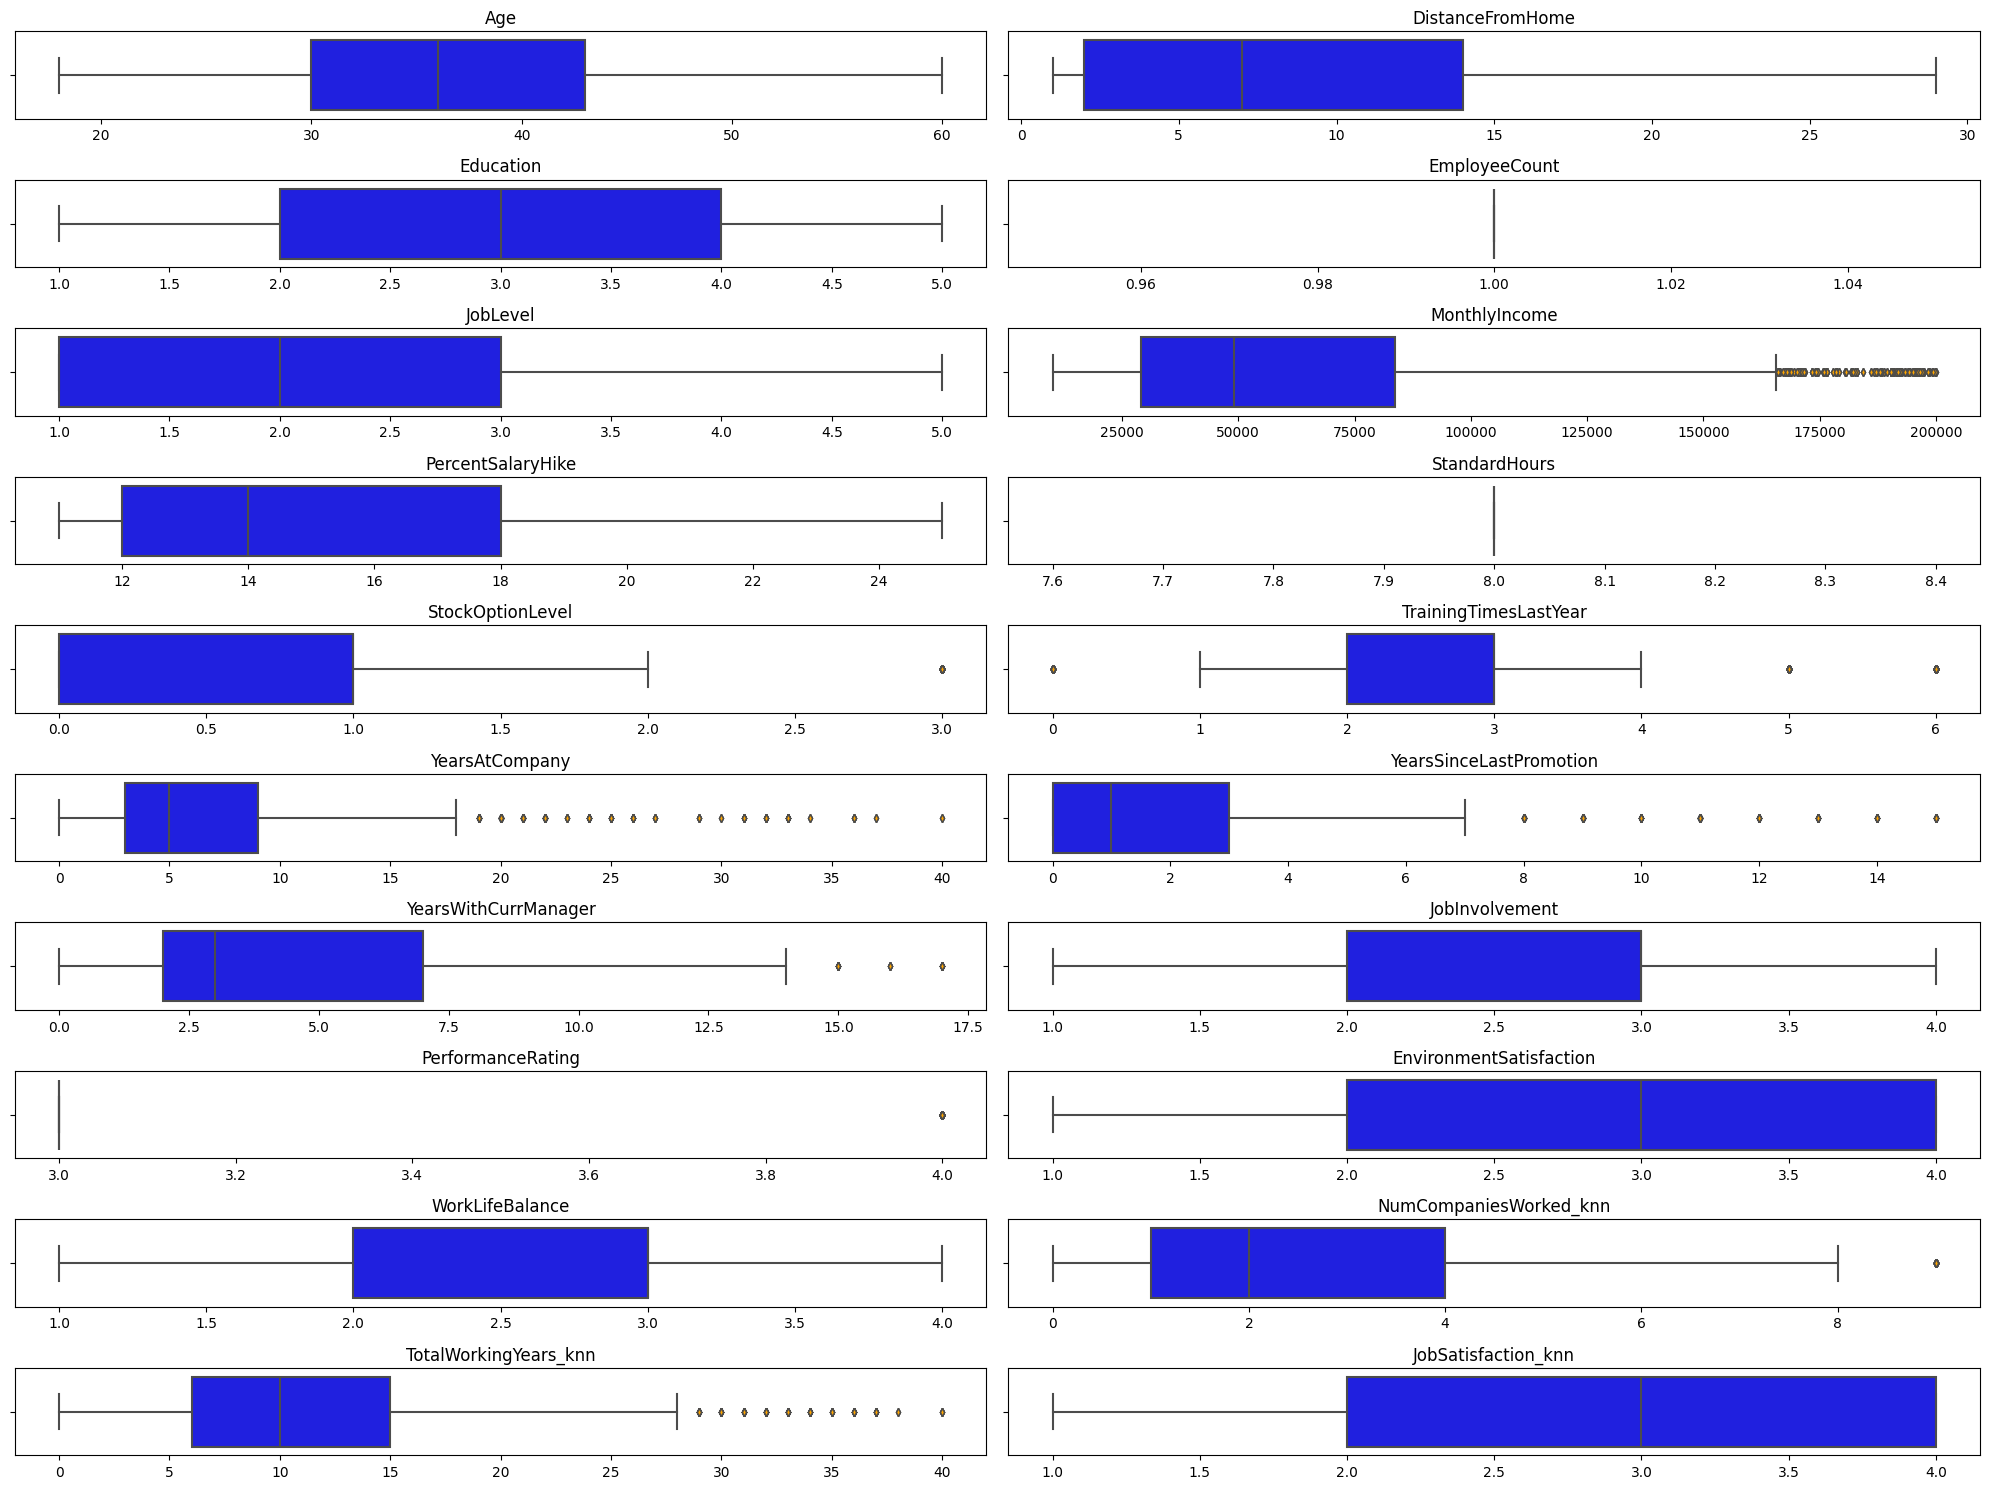

In [15]:
GestorOutliersUnivariados.visualizar_outliers_univariados()

In [18]:
metodos_univariados = ["z_score", "iqr"]

for metodo in metodos_univariados:
    print(f" ##### {metodo.upper()} ####")
    GestorOutliersUnivariados.detectar_outliers(metodo = metodo)
    print("----------")

 ##### Z_SCORE ####
La cantidad de outliers que tenemos para la columna YEARSATCOMPANY es  75
La cantidad de outliers que tenemos para la columna YEARSSINCELASTPROMOTION es  126
La cantidad de outliers que tenemos para la columna YEARSWITHCURRMANAGER es  42
La cantidad de outliers que tenemos para la columna TOTALWORKINGYEARS_KNN es  48
----------
 ##### IQR ####
La cantidad de outliers que tenemos para la columna MONTHLYINCOME es 342
La cantidad de outliers que tenemos para la columna STOCKOPTIONLEVEL es 255
La cantidad de outliers que tenemos para la columna TRAININGTIMESLASTYEAR es 714
La cantidad de outliers que tenemos para la columna YEARSATCOMPANY es 312
La cantidad de outliers que tenemos para la columna YEARSSINCELASTPROMOTION es 321
La cantidad de outliers que tenemos para la columna YEARSWITHCURRMANAGER es 42
La cantidad de outliers que tenemos para la columna PERFORMANCERATING es 678
La cantidad de outliers que tenemos para la columna NUMCOMPANIESWORKED_KNN es 156
La cantid